# Linear Discriminant Analysis
Redução de dimensionalidade e classificação.

O problema da redução de dimensionalidade consiste em encontrar uma matriz de projeção $W$ *L X D* tal que um ponto **$x$** com *D* features seja projetado num espaço *L* dimensional. Trabalhar em menos dimensões permite acelerar a execução de modelos e também eliminar dados irrelevantes, aumentando a precisão, além de permitir visualização da informação, caso *L* <= 3.

Aqui abordaremos o LDA (*Linear Discriminant Analysis*) e o LDA de Fisher como modelo de classificação e redução de dimensionalidade. Começando pelo caso de duas classes e projeção em um vetor ($L = 1$) e partindo depois para um caso mais geral.

O LDA, diferentemente de outros métodos como o PCA, é um modelo de redução de dimensionalidade supervisionado, que considera as classes das observações ao buscar a melhor projeção, sendo assim apropriado para problemas de classificação.

## Primeiro caso

Começaremos com a seguinte situação: seja $\mathbf{X} = (X_1, ... ,X_n)$ o vetor (matriz) de observações num espaço bi-dimensional, divididas nas classes 1 e 2. Buscamos um vetor $l$ no qual serão projetadas as observações de $\mathbf{X}$. Sendo assim, denotaremos como $\mathbf{Y} = l\mathbf{X}$ o vetor das projeções, $\mathbf{Y_1}$ as projeções da classe 1 e $\mathbf{Y_2}$ as projeções da classe 2.

O LDA busca a projeção que maximize a distância entre as médias das projeções e minimize a variância.

Introduziremos as seguintes notações:
$$
\begin{align}
u_k &= \frac{1}{N_k}\sum{x_k^{(i)}}  \text{(média das observações da classe k)} \\
m_k &= \frac{1}{N_k}\sum{y_k^{(i)}} \text{(média das projeções da classe k)} \\
s^2_k &= \frac{1}{N_k}\sum{(y_k^{(i)} - m_k)^2} & \text{(variância dentro da classe k)} \\
\end{align}
$$
Note que nas equações a seguir vv^T denota o produto externo
$$
\begin{align}
S_k = \sum{(x_k^{(i)} - u_k)(x_k^{(i)} - u_k)^T} &\text{(matriz de dispersão(variância amostral) dentro da classe k)} \\
S_W = \sum{S_k}  &\text{(Matriz de dispersão(variância amostral) combinada)} \\
S_B = (u_1 - u_2)(u_1 - u_2)^T  &\text{(Matriz de dispersão(variância amostral) entre as classes)} \\ 
\end{align}
$$
Assim, nosso problema se torna maximizar a seguinte razão:
$$
\begin{equation}
\frac{||m_1 - m_2||^2}{s_1^2 + s_2^2}
\end{equation}
$$
Que pode ser reescrita:
$$
\begin{align}
\frac{||m_1 - m_2||^2}{s_1^2 + s_2^2} &= \frac{l^T(u_1 - u_2)^2}{l^TS_1l + l^TS_2l} = \\
J(l) &= \frac{l^TS_Bl}{l^TS_Wl}
\end{align}
$$

Assim, reescrevemos a razão como função do vetor $l$, podendo maximizá-la por métodos tradicionais do cálculo diferencial. Aqui, não serão explicitados todos os passos da manipulação, pois foge ao escopo desse trabalho.

$$
\begin{align}
&\frac{\partial J(l)}{\partial l} = 0 \\
&l = \frac{c}{J}S_W^{-1}(u_2 - u_1)\quad \text{Onde c e J são escalares.} \\
&\text{Logo, a direção do vetor é dada por:} \\
&l = S_W^{-1}(u_2 - u_1)
\end{align}
$$

Para realizar a redução de dimensionalidade, paramos neste resultado conhecido como Discriminante Linear de Fischer, para utilizar esse modelo para classificação, é necessário criar um limiar de classificação linear, que consiste em atribuir a uma observação a classe cuja média está mais próxima. O que é simples e rápido, porém um pouco limitado, por isso o LDA de Fischer é frequentemente utilizado para a redução de dimensionalidade.


Exemplificaremos este processo com um dataset bidimensional de 2 classes gerado artificialmente com a biblioteca sklearn

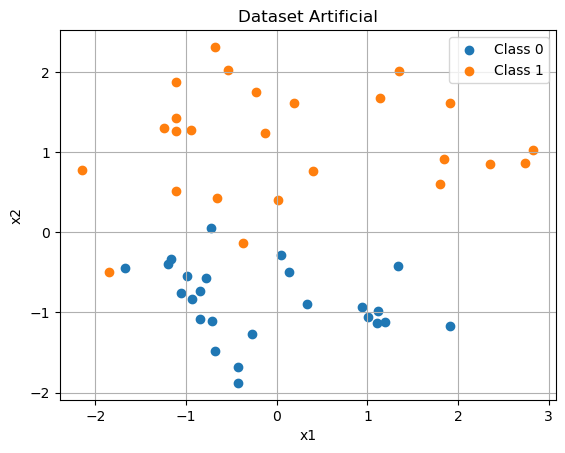

In [2]:
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np

# Gera dataset artificial
x, y = make_classification(50, 2, n_redundant=0, n_repeated=0)
for class_label in np.unique(y):
    class_points = x[y == class_label]
    plt.scatter(class_points[:, 0], class_points[:, 1], label=f"Class {class_label}")

# Adding labels and legend
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Dataset Artificial")
plt.legend()
plt.grid(True)
plt.show()



In [3]:
# Separacao em classes
x1 = []
x2 = []
for i in range(x.shape[0]):
    if y[i] == 0:
        x1.append(i)
    else:
        x2.append(i)
x1 = np.array(x1)
x2 = np.array(x2)
u1 = np.mean(x[x1], axis=0)
u2 = np.mean(x[x2], axis=0)

In [4]:
# Matrizes de covariancia
s1 = np.cov(x[x1], rowvar=False)
s2 = np.cov(x[x2], rowvar=False)
spooled = (x1.shape[0]/x.shape[0])* s1 + (x2.shape[0]/x.shape[0])* s2
spooled.shape

(2, 2)

In [5]:
# Calculo do melhor vetor
l = np.linalg.inv(spooled) @ (u1 - u2)
l = l / np.linalg.norm(l)
l

array([-0.03950929, -0.9992192 ])

In [6]:
projection = l @ x.T
projection = np.outer(projection,l)
projection

array([[-4.40266755e-02, -1.11346718e+00],
       [ 1.84881191e-02,  4.67578204e-01],
       [-6.71725576e-02, -1.69884365e+00],
       [ 6.42851096e-02,  1.62581796e+00],
       [ 3.82819077e-02,  9.68177753e-01],
       [ 4.82222057e-02,  1.21957524e+00],
       [ 1.59844483e-02,  4.04258516e-01],
       [ 1.61059261e-02,  4.07330781e-01],
       [-1.44770022e-02, -3.66134089e-01],
       [ 9.42417003e-04,  2.38344229e-02],
       [ 8.17311402e-02,  2.06704097e+00],
       [-5.03044157e-02, -1.27223587e+00],
       [ 3.90472204e-02,  9.87533076e-01],
       [ 3.73858878e-02,  9.45516748e-01],
       [-4.27444813e-02, -1.08103954e+00],
       [-1.47777764e-02, -3.73740893e-01],
       [ 6.70640273e-02,  1.69609884e+00],
       [ 6.90005485e-02,  1.74507489e+00],
       [ 5.49501707e-02,  1.38973045e+00],
       [-1.09063704e-02, -2.75830171e-01],
       [-2.34746148e-02, -5.93690367e-01],
       [ 3.09185628e-02,  7.81953317e-01],
       [-7.48828213e-02, -1.89384192e+00],
       [-4.

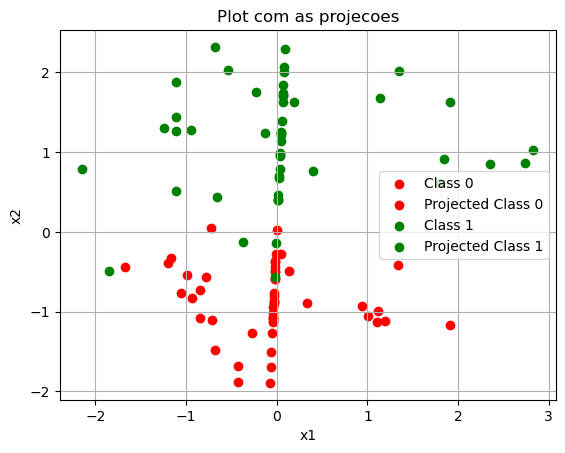

In [ ]:
# Plot
colors = ["red", "green"]
for class_label in np.unique(y):
    # Select points for each class
    class_points = x[y == class_label]
    plt.scatter(class_points[:,0], class_points[:,1],color=colors[class_label], label=f"Class {class_label}")
    class_points = projection[y == class_label]
    plt.scatter(class_points[:,0], class_points[:,1], color=colors[class_label],label=f"Projected Class {class_label}")


plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Plot com as projecoes")
plt.legend()
plt.grid(True)
plt.show()

É notável que a linha onde foram projetados os pontos separa muito bem as médias, compararemos com o PCA, utilizando o mesmo dataset.

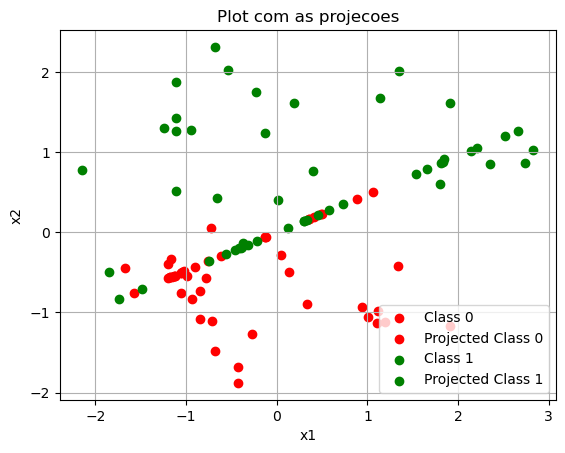

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(1).fit(x)
projection = pca.components_[0] * pca.transform(x)
# Plot
colors = ["red", "green"]
for class_label in np.unique(y):
    class_points = x[y == class_label]
    plt.scatter(class_points[:,0], class_points[:,1],color=colors[class_label], label=f"Class {class_label}")
    class_points = projection[y == class_label]
    plt.scatter(class_points[:,0], class_points[:,1], color=colors[class_label],label=f"Projected Class {class_label}")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Plot com as projecoes")
plt.legend()
plt.grid(True)
plt.show()

Evidentemente, o PCA não realiza bem o trabalho de separar as classes, o que se deve ao PCA apenas considerar a variância dos dados, enquanto o LDA considera as classes e sua distribuição.

## Segundo caso: generalização

Agora, nosso objetivo passa a ser encontrar uma matriz de projeção $W$ cujas colunas $\{w_1, ..., w_L\}$ são os vetores onde serão projetadas as observações. Algumas definições são alteradas:
$$
\begin{align}
u &= \frac{1}{N}\sum{x^{(i)}}\quad \text{(Média de todas as observações)} \\
S_W &= \sum_{k=1}^{|C|}N_k{\sum_{x \in C_k}{(x - u_k)(x - u_k)^T}} \quad\text{(Matriz de dispersão(variância amostral) combinada)} \\
S_B &= \sum_{k=1}^{|C|}{\frac{N_k}{N}(u_k - u)(u_k - u)^T}\quad\text{(Matriz de dispersão(variância amostral) entre as classes)} \\ 
\end{align}
$$

E o problema de otimização se torna:
$$
\begin{equation}
J(W) = \frac{|WS_BW^T|}{|WS_WW^T|}
\end{equation}
$$

O que pode ser resolvido como um problema de autovalores generalizado, cuja solução implica que as colunas de W serão os $L$ principais autovetores de $S_W^{-1}S_B$, ou em notação equivalente, utilizada por Murphy et. al., $W = S_W^{\frac{-1}{2}}U$, onde U é composta pelos $L$ autovetores principais de $S_W^{\frac{-1}{2}}S_BS_W^{\frac{-1}{2}}$. Isto assume que a matriz seja invertível.

Note que o LDA está limitado a reduzir a dimensão do espaço de features a no máximo C - 1 dimensões, onde C é o número de classes, o que está evidenciado pela dimensão da matriz $S_B$.

In [ ]:
# Aqui implementaremos o processo como funcao
def LDA(x, y,s):

  u = [] # media por classe
  class_count = [] # contagem por classe
  for c in np.unique(y):
      u.append(np.mean(x[y==c], axis=0))
      class_count.append(x[y==c].shape[0])
  u = np.array(u) 
  u_all = np.mean(x, axis=0) # media geral


  # Matrizes de covariancia
  Sb = np.sum([np.outer(ui - u_all, ui - u_all) * class_count[i] for i, ui in enumerate(u)], axis=0) / x.shape[0]
  Sc = [np.sum([np.outer(xi - u[i], xi - u[i]) for xi in x[y==i]], axis=0) / class_count[i] for i in range(len(class_count))]
  Sw = np.sum([sc * (class_count[i]/ x.shape[0])   for i, sc in enumerate(Sc)], axis=0)

  # Sw elavada a -1/2, utiliza autodecomposicao 
  eigenvalues, eigenvectors = np.linalg.eigh(Sw)
  Sw_inv_sqrt = eigenvectors @ np.diag(1 / np.sqrt(eigenvalues)) @ eigenvectors.T

  m = Sw_inv_sqrt @ Sb @ Sw_inv_sqrt
  eigenvalues, eigenvectors = np.linalg.eig(m)
  # Equacao usada por Murphy
  U = eigenvectors[:, :s]
  W = Sw_inv_sqrt @ U

  # Projeta os valores
  projection = np.transpose(W.T @ x.T)
  return projection

Exemplificaremos este processo nos datasets clássicos Iris e Breast Cancer, disponiveis pela biblioteca sklearn

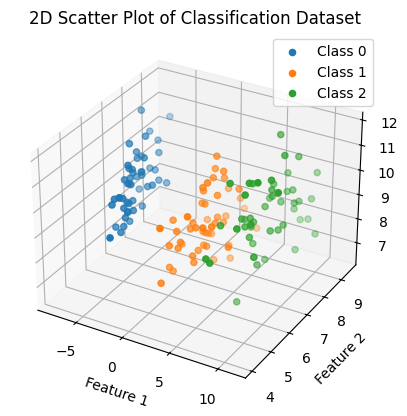

In [83]:
x, y = load_iris(return_X_y=True)
projection = LDA(x,y,3)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')


for class_label in np.unique(y):
    # Select points for each class
    class_points = projection[y == class_label]
    ax.scatter(class_points[:, 0], class_points[:, 1],class_points[:, 2], label=f"Class {class_label}")

# Adding labels and legend
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.title("2D Scatter Plot of Classification Dataset")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
projection = LDA(x,y,1)
ax = plt.subplot()


for class_label in np.unique(y):
    # Select points for each class
    class_points = projection[y == class_label]
    ax.scatter(class_points, np.zeros_like(class_points), label= cancer.target_names[class_label])

# Adding labels and legend
ax.set_xlabel('autovetor 1')
# ax.set_ylabel('autovetor 2')

plt.title("Gráfico 1d do Dataset Iris com redução dimensional(LDA)")
plt.legend()
plt.grid(True)
plt.show()